# Explicit conjunction: adding conjunction between subjects

Generating sentences of the form

- 1) **c and d have traveled to X, c didn't travel to X** (contradiction)
- 1) **c and d went to X, c didn't go to X** (contradiction)
- 1) **c and d have visited X, c didn't visit X** (contradiction)


- 2) **c and d have traveled to X, d didn't travel to X** (contradiction)
- 2) **c and d went to X, d didn't go to X** (contradiction)
- 2) **c and d have visited X, d didn't visit X** (contradiction)


- 3) **c and d have traveled to X, c didn't travel to Y ** (non-contradiction)
- 3) **c and d went to X, c didn't go to Y** (non-contradiction)
- 3) **c and d have visited X, c didn't visit Y** (non-contradiction)


- 4) **c and d have traveled to X, e didn't travel to X** (non-contradiction)
- 4) **c and d went to X, e didn't go to X** (non-contradiction)
- 4) **c and d have visited X, e didn't visit X** (non-contradiction)

In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, city_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

### Generating atoms

In [2]:
template1 = itertools.product(name_list, city_list)
template1 = list(template1)
upper_bound = 11000/4

### Generating all types of sentences

- 1) **c and d have traveled to X, c didn't travel to X** (contradiction)
- 1) **c and d went to X, c didn't go to X** (contradiction)
- 1) **c and d have visited X, c didn't visit X** (contradiction)

In [3]:
np.random.shuffle(template1)
all_sentences_1 = []
for i in range(int(upper_bound)):
    person1, place = template1[i]
    person2 = person1
    while person2 == person1:
        new_i = np.random.choice(len(template1))
        person2, _ = template1[new_i]
    if i%3 == 0:
        sentence = "{} and {} have traveled to {},{} didn't travel to {}".format(person1, person2, place, person1, place)
    elif i%3 ==1:
        sentence = "{} and {} went to {},{} didn't go to {}".format(person1, person2, place, person1, place)
    else:
        sentence = "{} and {} have visited {},{} didn't visit {}".format(person1, person2, place, person1, place)
    all_sentences_1.append(sentence)

all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)


['Max and Drake have traveled to Timisoara', "Max didn't travel to Timisoara", 1]
['Wednesday and Royce went to Turda', "Wednesday didn't go to Turda", 1]
['Garrison and Brandon have visited Turda', "Garrison didn't visit Turda", 1]
['Hudson and Warrick have traveled to Giurgiu', "Hudson didn't travel to Giurgiu", 1]
['Noreen and Udell went to Mangalia', "Noreen didn't go to Mangalia", 1]
['Dolly and Hilton have visited Giurgiu', "Dolly didn't visit Giurgiu", 1]
['Cleveland and Joe have traveled to Tulcea', "Cleveland didn't travel to Tulcea", 1]
['Bond and Hadden went to Giurgiu', "Bond didn't go to Giurgiu", 1]
['Quilla and Whittaker have visited Mangalia', "Quilla didn't visit Mangalia", 1]
['Lane and Madisyn have traveled to Slobozia', "Lane didn't travel to Slobozia", 1]


- 2) **c and d have traveled to X, d didn't travel to X** (contradiction)
- 2) **c and d went to X, d didn't go to X** (contradiction)
- 2) **c and d have visited X, d didn't visit X** (contradiction)

In [4]:
np.random.shuffle(template1)
all_sentences_2 = []
for i in range(int(upper_bound)):
    person1, place = template1[i]
    person2 = person1
    while person2 == person1:
        new_i = np.random.choice(len(template1))
        person2, _ = template1[new_i]
    if i%3 == 0:
        sentence = "{} and {} have traveled to {},{} didn't travel to {}".format(person1, person2, place, person2, place)
    elif i%3 ==1:
        sentence = "{} and {} went to {},{} didn't go to {}".format(person1, person2, place, person2, place)
    else:
        sentence = "{} and {} have visited {},{} didn't visit {}".format(person1, person2, place, person2, place)
    all_sentences_2.append(sentence)

all_sentences_2 = [sentence.split(",") + [1] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)

['Tamsin and Brawley have traveled to Mangalia', "Brawley didn't travel to Mangalia", 1]
['Fortitude and Nixon went to Lugoj', "Nixon didn't go to Lugoj", 1]
['Ellis and Grayson have visited Timisoara', "Grayson didn't visit Timisoara", 1]
['Stanford and Davidson have traveled to Lugoj', "Davidson didn't travel to Lugoj", 1]
['Clay and Harleth went to Lugoj', "Harleth didn't go to Lugoj", 1]
['Max and Harpo have visited Blaj', "Harpo didn't visit Blaj", 1]
['Barnett and Alyssa have traveled to Bucharest', "Alyssa didn't travel to Bucharest", 1]
['Crew and Henrietta went to Tulcea', "Henrietta didn't go to Tulcea", 1]
['Lake and Mildred have visited Turda', "Mildred didn't visit Turda", 1]
['Gifford and Cade have traveled to Turda', "Cade didn't travel to Turda", 1]


- 3) **c and d have traveled to X, c (d) didn't travel to Y ** (non-contradiction)
- 3) **c and d went to X, c (d) didn't go to Y** (non-contradiction)
- 3) **c and d have visited X, c (d) didn't visit Y** (non-contradiction)

In [5]:
np.random.shuffle(template1)
all_sentences_3 = []
for i in range(int(upper_bound)):
    person1, place1 = template1[i]
    person2 = person1
    place2 = place1
    while person2 == person1 and place2 == place1:
        new_i = np.random.choice(len(template1))
        person2, place2 = template1[new_i]
    if i%2 ==0:
        person3 = person1
    else:
        person3 = person2
    if i%3 == 0:
        sentence = "{} and {} have traveled to {},{} didn't travel to {}".format(person1, person2, place1, person3, place2)
    elif i%3 ==1:
        sentence = "{} and {} went to {},{} didn't go to {}".format(person1, person2, place1, person3, place2)
    else:
        sentence = "{} and {} have visited {},{} didn't visit {}".format(person1, person2, place1, person3, place2)
    all_sentences_3.append(sentence)

all_sentences_3 = [sentence.split(",") + [0] for sentence in all_sentences_3]

for sentence in all_sentences_3[0:10]:
    print(sentence)

['Eldred and Fleet have traveled to Giurgiu', "Eldred didn't travel to Slobozia", 0]
['Bradshaw and Keats went to Slatina', "Keats didn't go to Vaslui", 0]
['Drake and Mace have visited Giurgiu', "Drake didn't visit Timisoara", 0]
['Kelsey and Daulton have traveled to Turda', "Daulton didn't travel to Baia Mare", 0]
['Elberta and Hill went to Hunedoara', "Elberta didn't go to Oradea", 0]
['Etta and Briggs have visited Blaj', "Briggs didn't visit Slobozia", 0]
['Dale and Finch have traveled to Oradea', "Dale didn't travel to Turda", 0]
['Bligh and Reynold went to Arad', "Reynold didn't go to Blaj", 0]
['Stanford and Julian have visited Dej', "Stanford didn't visit Oradea", 0]
['Elton and Alyssa have traveled to Turda', "Alyssa didn't travel to Slatina", 0]


- 4) **c and d have traveled to X, e didn't travel to X** (non-contradiction)
- 4) **c and d went to X, e didn't go to X** (non-contradiction)
- 4) **c and d have visited X, e didn't visit X** (non-contradiction)

In [6]:
np.random.shuffle(template1)
all_sentences_4 = []
for i in range(int(upper_bound)):
    person1, place1 = template1[i]
    person2 = person1
    while person2 == person1:
        new_i = np.random.choice(len(template1))
        person2, _ = template1[new_i]
    person3 = person1
    while person3 == person1 or person3 == person2:
        new_i = np.random.choice(len(template1))
        person3, _ = template1[new_i]
    if i % 3 == 0:
        sentence = "{} and {} have traveled to {},{} didn't travel to {}".format(person1, person2, place1, person3, place1)
    elif i % 3 == 1:
        sentence = "{} and {} went to {},{} didn't go to {}".format(person1, person2, place1, person3, place1)
    else:
        sentence = "{} and {} have visited {},{} didn't visit {}".format(person1, person2, place1, person3, place1)
    all_sentences_4.append(sentence)

all_sentences_4 = [sentence.split(",") + [0] for sentence in all_sentences_4]

for sentence in all_sentences_4[0:10]:
    print(sentence)

['Godiva and Mead have traveled to Craiova', "Fairfax didn't travel to Craiova", 0]
['Lane and Auberon went to Dej', "Riggan didn't go to Dej", 0]
['Peabody and Avery have visited Turda', "London didn't visit Turda", 0]
['Daulton and Poet have traveled to Reghin', "Queenie didn't travel to Reghin", 0]
['Ellie and Jack went to Vaslui', "Windsor didn't go to Vaslui", 0]
['Bolton and Discovery have visited Arad', "Waverly didn't visit Arad", 0]
['Hobart and Temperance have traveled to Blaj', "Squall didn't travel to Blaj", 0]
['Boo and Huckleberry went to Bucharest', "Birtle didn't go to Bucharest", 0]
['Spring and Fenton have visited Hunedoara', "Bradley didn't visit Hunedoara", 0]
['Ashley and Henley have traveled to Slatina', "Hayes didn't travel to Slatina", 0]


In [7]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)



size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)

all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("total size = {}".format(size))

type 1 size = 2750
type 2 size = 2750
type 3 size = 2750
type 4 size = 2750
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [8]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Rondel and Byron have visited Slatina,Byron didn't visit Hunedoara,0
10996,Lindsay and Brockton have visited Timisoara,Lindsay didn't visit Timisoara,1
10997,Dancer and Hartley went to Timisoara,New didn't go to Timisoara,0
10998,Parton and Kipling went to Oradea,Parton didn't go to Oradea,1
10999,Rae and Hollis went to Bucharest,Rae didn't go to Bucharest,1


#### Looking at the label distribution

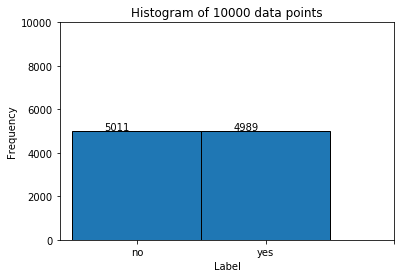

In [9]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "b2_a_iii_train.png")

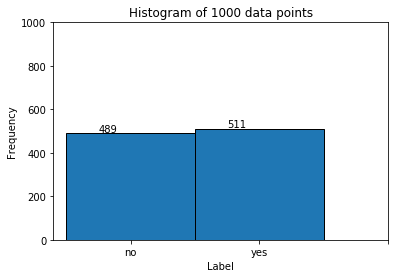

In [10]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "b2_a_iii_test.png")

### Saving to CSV

In [11]:
df_train.to_csv("b2_a_iii_train.csv", index=False)
df_test.to_csv("b2_a_iii_test.csv", index=False)